In [306]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

# Paramètres

In [307]:
L = 100 #time horizon
nb_iter = 25 #nb d'itérations pour la simulation de Montecarlo
m = 15 #dimension de l'espace de projection

X_0 = 10 # prix initial
K = 9.95 #strike
sigma = 0.02 # volatility

In [308]:
dW = np.random.normal(loc=0, scale=1, size=(nb_iter, L))

W = np.concatenate((np.zeros((nb_iter, 1)), np.cumsum(dW, axis=1)), axis=1)  #simulation de N mouvements browniens



def calculate_X_t(X_0, sigma, W, t, n):
    drift_term = - (sigma**2) * t / 2
    diffusion_term = sigma * W[n,t]
    X_t = X_0 * np.exp(diffusion_term + drift_term)
    return X_t


X = np.zeros(shape = (nb_iter, L+1))

for n in range(nb_iter):
    for j in range(L+1):
        X[n,j] = calculate_X_t(X_0, sigma, W, j, n)
        
        

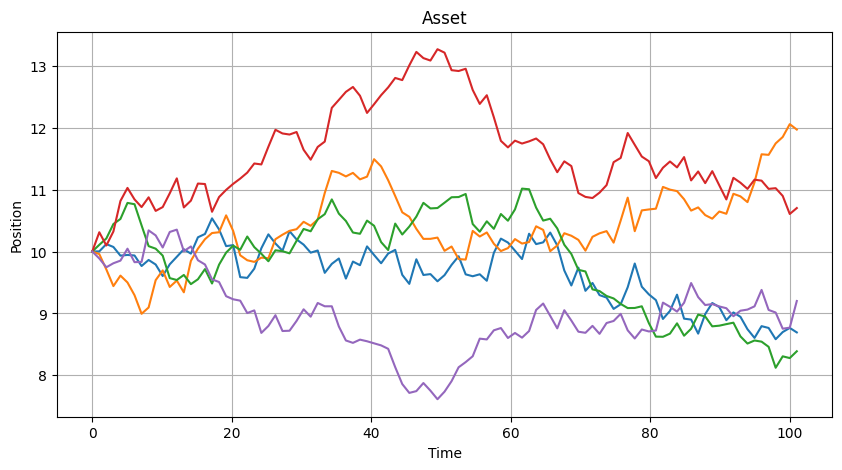

In [309]:
# Plot du mouvement brownien
t = np.linspace(0, L+1, L+1)
plt.figure(figsize=(10, 5))
for k in range(5):
    plt.plot(t, X[k,:])
plt.title('Asset')
plt.xlabel('Time')
plt.ylabel('Position')
plt.grid(True)
plt.show()

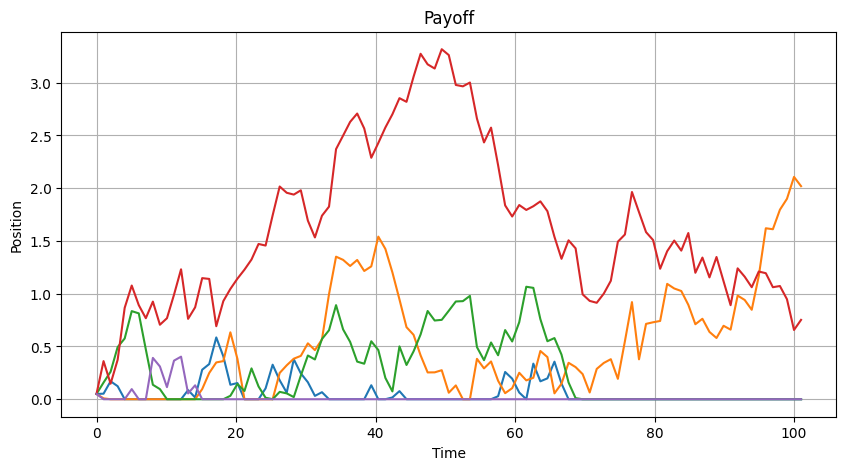

In [310]:
Z = np.maximum(X - K, 0)
plt.figure(figsize=(10, 5))
for k in range(5):
    plt.plot(t, Z[k,:])
plt.title('Payoff')
plt.xlabel('Time')
plt.ylabel('Position')
plt.grid(True)
plt.show()

In [311]:
tau = np.zeros(shape = (nb_iter,L),dtype=int)
alpha = np.zeros(shape = (L-1,m))
tau[:,L-1] = L #initialisation

In [312]:
def e(i,x):
    return x**i


def vect_e(m,x):
    res = np.zeros(shape = m)
    for i in range(m):
        res[i] = e(i, x)
    return res


def indicatrice(n,j): # j est le temps, n représente l'itération numéro de l'itération  
    return int( Z[n,j] >= np.dot(alpha[j], vect_e(m,X[n,j])))

def indicatrice_barre(n,j):
    return 1 - indicatrice(n,j)


    
def tau_precedent(n,j):
    return j * indicatrice(n,j) + tau[n, j+1] * indicatrice_barre(n,j)

def compute_alpha(j):
    a = np.ones(shape = m)
    def error_function(a):
        error = 0
        for n in range(nb_iter):
            error += (Z[n,tau[n,j+1]] - np.dot(a, vect_e(m,X[n,j]))) **2
        return error
    result = minimize(error_function, a)
    return result


# Calcul de tau et alpha

In [313]:
for j in range(L-2,-1,-1):
    alpha[j] = compute_alpha(j).x
    for n in range(nb_iter):
        tau[n,j] = tau_precedent(n,j)

In [314]:
print(tau[:,0])
print(max(tau[:,0]))

[22  7 38 38 22 26  2  2 22 38 34 22 22 26 87 16 38 38 74  2  2 45 87 22
 26]
87


In [315]:
somme_Z_tau = 0
for n in range(nb_iter):
    somme_Z_tau += Z[n, tau[n,0]]
   
price  = max(Z[0,0], somme_Z_tau/ nb_iter)
print(price)
print(somme_Z_tau / nb_iter)

0.2688891814598011
0.2688891814598011
